# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 34ms/step - loss: 0.3341 - accuracy: 0.8424 - val_loss: 0.2684 - val_accuracy: 0.9023
Epoch 2/50
8/8 [==============================] - 0

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9469
Test accuracy: 0.9469230771064758


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [6]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.7638.hdf5

Epoch 2: saving model to ./data/model/all\02-0.7638.hdf5

Epoch 3: saving model to ./data/model/all\03-0.7715.hdf5

Epoch 4: saving model to ./data/model/all\04-0.7854.hdf5

Epoch 5: saving model to ./data/model/all\05-0.8800.hdf5

Epoch 6: saving model to ./data/model/all\06-0.8931.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9092.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9262.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9308.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9292.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9323.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9323.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9315.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9315.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9315.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9315.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9323.hdf5

Epoch

In [7]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.9515
Test accuracy: 0.9515384435653687


## 3. 그래프로 과적합 확인하기

In [8]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [9]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.157574,0.948678,0.172594,0.946154
1,0.156266,0.948678,0.172019,0.946154
2,0.156193,0.948935,0.173187,0.944615
3,0.154211,0.949961,0.169072,0.946923
4,0.152928,0.950475,0.168837,0.945385
...,...,...,...,...
1995,0.019634,0.994868,0.099344,0.982308
1996,0.018732,0.995638,0.090763,0.983846
1997,0.017488,0.995894,0.097216,0.982308
1998,0.017269,0.995894,0.097050,0.982308


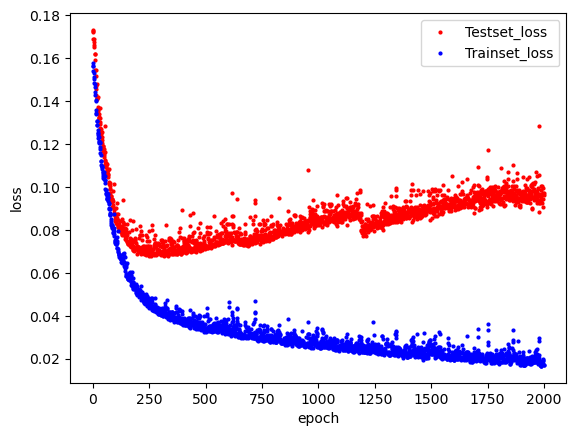

In [10]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [12]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 33ms/step - loss: 1.1617 - accuracy: 0.5725 - val_loss: 0.2840 - val_accuracy: 0.8900
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3598 - accuracy: 0.8548 - val_loss: 0.3651 - val_accuracy: 0.8715
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4008 - accuracy: 0.8537 - val_loss: 0.3372 - val_accuracy: 0.8938
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3505 - accuracy: 0.8820 - val_loss: 0.2884 - val_accuracy: 0.9077
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3004 - accuracy: 0.9033 - val_loss: 0.2631 - val_accuracy: 0.9185
Epoch 6/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2718 - accuracy: 0.9158 - val_loss: 0.2339 - val_accuracy: 0.9277
Epoch 7/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.9230 - val_loss: 0.2183 - val_accuracy: 0.9377
Epoch 8/2000


Epoch 59/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1709 - accuracy: 0.9379 - val_loss: 0.1646 - val_accuracy: 0.9446
Epoch 60/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1699 - accuracy: 0.9374 - val_loss: 0.1627 - val_accuracy: 0.9446
Epoch 61/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1689 - accuracy: 0.9384 - val_loss: 0.1630 - val_accuracy: 0.9446
Epoch 62/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1679 - accuracy: 0.9394 - val_loss: 0.1617 - val_accuracy: 0.9446
Epoch 63/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1669 - accuracy: 0.9392 - val_loss: 0.1608 - val_accuracy: 0.9446
Epoch 64/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1660 - accuracy: 0.9397 - val_loss: 0.1602 - val_accuracy: 0.9446
Epoch 65/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1657 - accuracy: 0.9389 - val_loss: 0.1595 - val_accuracy: 0.9454
Epoch 66

8/8 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.9677 - val_loss: 0.1059 - val_accuracy: 0.9723
Epoch 117/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0944 - accuracy: 0.9677 - val_loss: 0.0989 - val_accuracy: 0.9708
Epoch 118/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0915 - accuracy: 0.9700 - val_loss: 0.0981 - val_accuracy: 0.9638
Epoch 119/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0914 - accuracy: 0.9690 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 120/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0909 - accuracy: 0.9692 - val_loss: 0.0982 - val_accuracy: 0.9708
Epoch 121/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0895 - accuracy: 0.9705 - val_loss: 0.0951 - val_accuracy: 0.9708
Epoch 122/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0891 - accuracy: 0.9700 - val_loss: 0.0962 - val_accuracy: 0.9669
Epoch 123/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0709 - accuracy: 0.9774 - val_loss: 0.0729 - val_accuracy: 0.9800
Epoch 174/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0729 - accuracy: 0.9749 - val_loss: 0.0739 - val_accuracy: 0.9800
Epoch 175/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0718 - val_accuracy: 0.9808
Epoch 176/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.0723 - val_accuracy: 0.9815
Epoch 177/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0722 - val_accuracy: 0.9808
Epoch 178/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.0767 - val_accuracy: 0.9808
Epoch 179/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0713 - val_accuracy: 0.9815
Epoch 180/2000


8/8 [==============================] - 0s 12ms/step - loss: 0.0549 - accuracy: 0.9843 - val_loss: 0.0615 - val_accuracy: 0.9846
Epoch 231/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0540 - accuracy: 0.9856 - val_loss: 0.0613 - val_accuracy: 0.9862
Epoch 232/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0609 - val_accuracy: 0.9862
Epoch 233/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.0608 - val_accuracy: 0.9846
Epoch 234/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0537 - accuracy: 0.9849 - val_loss: 0.0605 - val_accuracy: 0.9854
Epoch 235/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0528 - accuracy: 0.9846 - val_loss: 0.0614 - val_accuracy: 0.9846
Epoch 236/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0534 - accuracy: 0.9849 - val_loss: 0.0608 - val_accuracy: 0.9854
Epoch 237/2000

In [13]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9715
Test accuracy: 0.9715384840965271
